In [6]:
import itertools

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import sklearn.preprocessing as preprocess 

import seaborn as sns
sns.set_theme(style="white")
plt.style.use("seaborn")

%matplotlib inline

from tqdm.notebook import tqdm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
data = pd.read_pickle("../data/preprocessed/load.pkl")


In [40]:
data.describe()


,SFH10_S_1,SFH10_S_2,SFH10_S_3,SFH10_S_TOT,SFH10_I_1,SFH10_I_2,SFH10_I_3,SFH10_PF_1,SFH10_PF_2,SFH10_PF_3,SFH10_PF_TOT,SFH10_P_1,SFH10_P_2,SFH10_P_3,SFH10_P_TOT,SFH10_Q_1,SFH10_Q_2,SFH10_Q_3,SFH10_Q_TOT,SFH10_U_1,SFH10_U_2,SFH10_U_3,SFH11_S_1,SFH11_S_2,SFH11_S_3,SFH11_S_TOT,SFH11_I_1,SFH11_I_2,SFH11_I_3,SFH11_PF_1,SFH11_PF_2,SFH11_PF_3,SFH11_PF_TOT,SFH11_P_1,SFH11_P_2,SFH11_P_3,SFH11_P_TOT,SFH11_Q_1,SFH11_Q_2,SFH11_Q_3,SFH11_Q_TOT,SFH11_U_1,SFH11_U_2,SFH11_U_3,SFH12_S_1,SFH12_S_2,SFH12_S_3,SFH12_S_TOT,SFH12_I_1,SFH12_I_2,SFH12_I_3,SFH12_PF_1,SFH12_PF_2,SFH12_PF_3,SFH12_PF_TOT,SFH12_P_1,SFH12_P_2,SFH12_P_3,SFH12_P_TOT,SFH12_Q_1,SFH12_Q_2,SFH12_Q_3,SFH12_Q_TOT,SFH12_U_1,SFH12_U_2,SFH12_U_3,SFH14_S_1,SFH14_S_2,SFH14_S_3,SFH14_S_TOT,SFH14_I_1,SFH14_I_2,SFH14_I_3,SFH14_PF_1,SFH14_PF_2,SFH14_PF_3,SFH14_PF_TOT,SFH14_P_1,SFH14_P_2,SFH14_P_3,SFH14_P_TOT,SFH14_Q_1,SFH14_Q_2,SFH14_Q_3,SFH14_Q_TOT,SFH14_U_1,SFH14_U_2,SFH14_U_3,SFH16_S_1,SFH16_S_2,SFH16_S_3,SFH16_S_TOT,SFH16_I_1,SFH16_I_2,SFH16_I_3,SFH16_PF_1,SFH16_PF_2,SFH16_PF_3,SFH16_PF_TOT,SFH16_P_1,SFH16_P_2,SFH16_P_3,SFH16_P_TOT,SFH16_Q_1,SFH16_Q_2,SFH16_Q_3,SFH16_Q_TOT,SFH16_U_1,SFH16_U_2,SFH16_U_3,SFH17_S_1,SFH17_S_2,SFH17_S_3,SFH17_S_TOT,SFH17_I_1,SFH17_I_2,SFH17_I_3,SFH17_PF_1,SFH17_PF_2,SFH17_PF_3,SFH17_PF_TOT,SFH17_P_1,SFH17_P_2,SFH17_P_3,SFH17_P_TOT,SFH17_Q_1,SFH17_Q_2,SFH17_Q_3,SFH17_Q_TOT,SFH17_U_1,SFH17_U_2,SFH17_U_3,SFH18_S_1,SFH18_S_2,SFH18_S_3,SFH18_S_TOT,SFH18_I_1,SFH18_I_2,SFH18_I_3,SFH18_PF_1,SFH18_PF_2,SFH18_PF_3,SFH18_PF_TOT,SFH18_P_1,SFH18_P_2,SFH18_P_3,SFH18_P_TOT,SFH18_Q_1,SFH18_Q_2,SFH18_Q_3,SFH18_Q_TOT,SFH18_U_1,SFH18_U_2,SFH18_U_3,SFH19_S_1,SFH19_S_2,SFH19_S_3,SFH19_S_TOT,SFH19_I_1,SFH19_I_2,SFH19_I_3,SFH19_PF_1,SFH19_PF_2,SFH19_PF_3,SFH19_PF_TOT,SFH19_P_1,SFH19_P_2,SFH19_P_3,SFH19_P_TOT,SFH19_Q_1,SFH19_Q_2,SFH19_Q_3,SFH19_Q_TOT,SFH19_U_1,SFH19_U_2,SFH19_U_3,SFH20_S_1,SFH20_S_2,SFH20_S_3,SFH20_S_TOT,SFH20_I_1,SFH20_I_2,SFH20_I_3,SFH20_PF_1,SFH20_PF_2,SFH20_PF_3,SFH20_PF_TOT,SFH20_P_1,SFH20_P_2,SFH20_P_3,SFH20_P_TOT,SFH20_Q_1,SFH20_Q_2,SFH20_Q_3,SFH20_Q_TOT,SFH20_U_1,SFH20_U_2,SFH20_U_3,SFH21_S_1,SFH21_S_2,SFH21_S_3,SFH21_S_TOT,SFH21_I_1,SFH21_I_2,SFH21_I_3,SFH21_PF_1,SFH21_PF_2,SFH21_PF_3,SFH21_PF_TOT,SFH21_P_1,SFH21_P_2,SFH21_P_3,SFH21_P_TOT,SFH21_Q_1,SFH21_Q_2,SFH21_Q_3,SFH21_Q_TOT,SFH21_U_1,SFH21_U_2,SFH21_U_3,SFH22_S_1,SFH22_S_2,SFH22_S_3,SFH22_S_TOT,SFH22_I_1,SFH22_I_2,SFH22_I_3,SFH22_PF_1,SFH22_PF_2,SFH22_PF_3,SFH22_PF_TOT,SFH22_P_1,SFH22_P_2,SFH22_P_3,SFH22_P_TOT,SFH22_Q_1,SFH22_Q_2,SFH22_Q_3,SFH22_Q_TOT,SFH22_U_1,SFH22_U_2,SFH22_U_3,SFH23_S_1,SFH23_S_2,SFH23_S_3,SFH23_S_TOT,SFH23_I_1,SFH23_I_2,SFH23_I_3,SFH23_PF_1,SFH23_PF_2,SFH23_PF_3,SFH23_PF_TOT,SFH23_P_1,SFH23_P_2,SFH23_P_3,SFH23_P_TOT,SFH23_Q_1,SFH23_Q_2,SFH23_Q_3,SFH23_Q_TOT,SFH23_U_1,SFH23_U_2,SFH23_U_3,SFH25_S_1,SFH25_S_2,SFH25_S_3,SFH25_S_TOT,SFH25_I_1,SFH25_I_2,SFH25_I_3,SFH25_PF_1,SFH25_PF_2,SFH25_PF_3,SFH25_PF_TOT,SFH25_P_1,SFH25_P_2,SFH25_P_3,SFH25_P_TOT,SFH25_Q_1,SFH25_Q_2,SFH25_Q_3,SFH25_Q_TOT,SFH25_U_1,SFH25_U_2,SFH25_U_3,SFH27_S_1,SFH27_S_2,SFH27_S_3,SFH27_S_TOT,SFH27_I_1,SFH27_I_2,SFH27_I_3,SFH27_PF_1,SFH27_PF_2,SFH27_PF_3,SFH27_PF_TOT,SFH27_P_1,SFH27_P_2,SFH27_P_3,SFH27_P_TOT,SFH27_Q_1,SFH27_Q_2,SFH27_Q_3,SFH27_Q_TOT,SFH27_U_1,SFH27_U_2,SFH27_U_3,SFH28_S_1,SFH28_S_2,SFH28_S_3,SFH28_S_TOT,SFH28_I_1,SFH28_I_2,SFH28_I_3,SFH28_PF_1,SFH28_PF_2,SFH28_PF_3,SFH28_PF_TOT,SFH28_P_1,SFH28_P_2,SFH28_P_3,SFH28_P_TOT,SFH28_Q_1,SFH28_Q_2,SFH28_Q_3,SFH28_Q_TOT,SFH28_U_1,SFH28_U_2,SFH28_U_3,SFH29_S_1,SFH29_S_2,SFH29_S_3,SFH29_S_TOT,SFH29_I_1,SFH29_I_2,SFH29_I_3,SFH29_PF_1,SFH29_PF_2,SFH29_PF_3,SFH29_PF_TOT,SFH29_P_1,SFH29_P_2,SFH29_P_3,SFH29_P_TOT,SFH29_Q_1,SFH29_Q_2,SFH29_Q_3,SFH29_Q_TOT,SFH29_U_1,SFH29_U_2,SFH29_U_3,SFH3_S_1,SFH3_S_2,SFH3_S_3,SFH3_S_TOT,SFH3_I_1,SFH3_I_2,SFH3_I_3,SFH3_PF_1,SFH3_PF_2,SFH3_PF_3,SFH3_PF_TOT,SFH3_P_1,SFH3_P_2,SFH3_P_3,SFH3_P_TOT,SFH3_Q_1,SFH3_Q_2,SFH3_Q_3,SFH3_Q_TOT,SFH3_U_1,SFH3_U_2,SFH3_U_3,SFH30_S_1,SFH30_S_2,SFH30_S_3,SFH30_S_TOT,SFH30_I_1,SFH30_I_2,SFH30_I_3,SFH30

In [41]:
data.tail()


,SFH10_S_1,SFH10_S_2,SFH10_S_3,SFH10_S_TOT,SFH10_I_1,SFH10_I_2,SFH10_I_3,SFH10_PF_1,SFH10_PF_2,SFH10_PF_3,SFH10_PF_TOT,SFH10_P_1,SFH10_P_2,SFH10_P_3,SFH10_P_TOT,SFH10_Q_1,SFH10_Q_2,SFH10_Q_3,SFH10_Q_TOT,SFH10_U_1,SFH10_U_2,SFH10_U_3,SFH11_S_1,SFH11_S_2,SFH11_S_3,SFH11_S_TOT,SFH11_I_1,SFH11_I_2,SFH11_I_3,SFH11_PF_1,SFH11_PF_2,SFH11_PF_3,SFH11_PF_TOT,SFH11_P_1,SFH11_P_2,SFH11_P_3,SFH11_P_TOT,SFH11_Q_1,SFH11_Q_2,SFH11_Q_3,SFH11_Q_TOT,SFH11_U_1,SFH11_U_2,SFH11_U_3,SFH12_S_1,SFH12_S_2,SFH12_S_3,SFH12_S_TOT,SFH12_I_1,SFH12_I_2,SFH12_I_3,SFH12_PF_1,SFH12_PF_2,SFH12_PF_3,SFH12_PF_TOT,SFH12_P_1,SFH12_P_2,SFH12_P_3,SFH12_P_TOT,SFH12_Q_1,SFH12_Q_2,SFH12_Q_3,SFH12_Q_TOT,SFH12_U_1,SFH12_U_2,SFH12_U_3,SFH14_S_1,SFH14_S_2,SFH14_S_3,SFH14_S_TOT,SFH14_I_1,SFH14_I_2,SFH14_I_3,SFH14_PF_1,SFH14_PF_2,SFH14_PF_3,SFH14_PF_TOT,SFH14_P_1,SFH14_P_2,SFH14_P_3,SFH14_P_TOT,SFH14_Q_1,SFH14_Q_2,SFH14_Q_3,SFH14_Q_TOT,SFH14_U_1,SFH14_U_2,SFH14_U_3,SFH16_S_1,SFH16_S_2,SFH16_S_3,SFH16_S_TOT,SFH16_I_1,SFH16_I_2,SFH16_I_3,SFH16_PF_1,SFH16_PF_2,SFH16_PF_3,SFH16_PF_TOT,SFH16_P_1,SFH16_P_2,SFH16_P_3,SFH16_P_TOT,SFH16_Q_1,SFH16_Q_2,SFH16_Q_3,SFH16_Q_TOT,SFH16_U_1,SFH16_U_2,SFH16_U_3,SFH17_S_1,SFH17_S_2,SFH17_S_3,SFH17_S_TOT,SFH17_I_1,SFH17_I_2,SFH17_I_3,SFH17_PF_1,SFH17_PF_2,SFH17_PF_3,SFH17_PF_TOT,SFH17_P_1,SFH17_P_2,SFH17_P_3,SFH17_P_TOT,SFH17_Q_1,SFH17_Q_2,SFH17_Q_3,SFH17_Q_TOT,SFH17_U_1,SFH17_U_2,SFH17_U_3,SFH18_S_1,SFH18_S_2,SFH18_S_3,SFH18_S_TOT,SFH18_I_1,SFH18_I_2,SFH18_I_3,SFH18_PF_1,SFH18_PF_2,SFH18_PF_3,SFH18_PF_TOT,SFH18_P_1,SFH18_P_2,SFH18_P_3,SFH18_P_TOT,SFH18_Q_1,SFH18_Q_2,SFH18_Q_3,SFH18_Q_TOT,SFH18_U_1,SFH18_U_2,SFH18_U_3,SFH19_S_1,SFH19_S_2,SFH19_S_3,SFH19_S_TOT,SFH19_I_1,SFH19_I_2,SFH19_I_3,SFH19_PF_1,SFH19_PF_2,SFH19_PF_3,SFH19_PF_TOT,SFH19_P_1,SFH19_P_2,SFH19_P_3,SFH19_P_TOT,SFH19_Q_1,SFH19_Q_2,SFH19_Q_3,SFH19_Q_TOT,SFH19_U_1,SFH19_U_2,SFH19_U_3,SFH20_S_1,SFH20_S_2,SFH20_S_3,SFH20_S_TOT,SFH20_I_1,SFH20_I_2,SFH20_I_3,SFH20_PF_1,SFH20_PF_2,SFH20_PF_3,SFH20_PF_TOT,SFH20_P_1,SFH20_P_2,SFH20_P_3,SFH20_P_TOT,SFH20_Q_1,SFH20_Q_2,SFH20_Q_3,SFH20_Q_TOT,SFH20_U_1,SFH20_U_2,SFH20_U_3,SFH21_S_1,SFH21_S_2,SFH21_S_3,SFH21_S_TOT,SFH21_I_1,SFH21_I_2,SFH21_I_3,SFH21_PF_1,SFH21_PF_2,SFH21_PF_3,SFH21_PF_TOT,SFH21_P_1,SFH21_P_2,SFH21_P_3,SFH21_P_TOT,SFH21_Q_1,SFH21_Q_2,SFH21_Q_3,SFH21_Q_TOT,SFH21_U_1,SFH21_U_2,SFH21_U_3,SFH22_S_1,SFH22_S_2,SFH22_S_3,SFH22_S_TOT,SFH22_I_1,SFH22_I_2,SFH22_I_3,SFH22_PF_1,SFH22_PF_2,SFH22_PF_3,SFH22_PF_TOT,SFH22_P_1,SFH22_P_2,SFH22_P_3,SFH22_P_TOT,SFH22_Q_1,SFH22_Q_2,SFH22_Q_3,SFH22_Q_TOT,SFH22_U_1,SFH22_U_2,SFH22_U_3,SFH23_S_1,SFH23_S_2,SFH23_S_3,SFH23_S_TOT,SFH23_I_1,SFH23_I_2,SFH23_I_3,SFH23_PF_1,SFH23_PF_2,SFH23_PF_3,SFH23_PF_TOT,SFH23_P_1,SFH23_P_2,SFH23_P_3,SFH23_P_TOT,SFH23_Q_1,SFH23_Q_2,SFH23_Q_3,SFH23_Q_TOT,SFH23_U_1,SFH23_U_2,SFH23_U_3,SFH25_S_1,SFH25_S_2,SFH25_S_3,SFH25_S_TOT,SFH25_I_1,SFH25_I_2,SFH25_I_3,SFH25_PF_1,SFH25_PF_2,SFH25_PF_3,SFH25_PF_TOT,SFH25_P_1,SFH25_P_2,SFH25_P_3,SFH25_P_TOT,SFH25_Q_1,SFH25_Q_2,SFH25_Q_3,SFH25_Q_TOT,SFH25_U_1,SFH25_U_2,SFH25_U_3,SFH27_S_1,SFH27_S_2,SFH27_S_3,SFH27_S_TOT,SFH27_I_1,SFH27_I_2,SFH27_I_3,SFH27_PF_1,SFH27_PF_2,SFH27_PF_3,SFH27_PF_TOT,SFH27_P_1,SFH27_P_2,SFH27_P_3,SFH27_P_TOT,SFH27_Q_1,SFH27_Q_2,SFH27_Q_3,SFH27_Q_TOT,SFH27_U_1,SFH27_U_2,SFH27_U_3,SFH28_S_1,SFH28_S_2,SFH28_S_3,SFH28_S_TOT,SFH28_I_1,SFH28_I_2,SFH28_I_3,SFH28_PF_1,SFH28_PF_2,SFH28_PF_3,SFH28_PF_TOT,SFH28_P_1,SFH28_P_2,SFH28_P_3,SFH28_P_TOT,SFH28_Q_1,SFH28_Q_2,SFH28_Q_3,SFH28_Q_TOT,SFH28_U_1,SFH28_U_2,SFH28_U_3,SFH29_S_1,SFH29_S_2,SFH29_S_3,SFH29_S_TOT,SFH29_I_1,SFH29_I_2,SFH29_I_3,SFH29_PF_1,SFH29_PF_2,SFH29_PF_3,SFH29_PF_TOT,SFH29_P_1,SFH29_P_2,SFH29_P_3,SFH29_P_TOT,SFH29_Q_1,SFH29_Q_2,SFH29_Q_3,SFH29_Q_TOT,SFH29_U_1,SFH29_U_2,SFH29_U_3,SFH3_S_1,SFH3_S_2,SFH3_S_3,SFH3_S_TOT,SFH3_I_1,SFH3_I_2,SFH3_I_3,SFH3_PF_1,SFH3_PF_2,SFH3_PF_3,SFH3_PF_TOT,SFH3_P_1,SFH3_P_2,SFH3_P_3,SFH3_P_TOT,SFH3_Q_1,SFH3_Q_2,SFH3_Q_3,SFH3_Q_TOT,SFH3_U_1,SFH3_U_2,SFH3_U_3,SFH30_S_1,SFH30_S_2,SFH30_S_3,SFH30_S_TOT,SFH30_I_1,SFH30_I_2,SFH30_I_3,SFH30

## Missing data

In [4]:
def visualize_nan():
    plt.subplots(figsize=(20, 10))
    sns.heatmap(data.isnull(), cbar=False)
    plt.xlabel("feature")
    plt.ylabel("row")
    plt.title("Viz. of missing values (colored in bright beige)")
    plt.show()


In [ ]:
visualize_nan()


In [44]:
threshold = 0.01

percentage_missing_val = data.isna().sum() / len(data)

percentage_missing_val = percentage_missing_val[percentage_missing_val >= threshold]
threshold_abs = int(threshold * len(data))

percentage_missing_val.sort_values(ascending=False, inplace=True)

print(percentage_missing_val)


SFH6_PF_TOT     0.609523
SFH6_P_1        0.609523
SFH6_U_3        0.609523
SFH6_U_2        0.609523
SFH6_U_1        0.609523
SFH6_Q_TOT      0.609523
SFH6_Q_3        0.609523
SFH6_Q_2        0.609523
SFH6_P_TOT      0.609523
SFH6_P_3        0.609523
SFH6_P_2        0.609523
SFH6_Q_1        0.609523
SFH6_PF_3       0.609523
SFH6_I_1        0.609523
SFH6_PF_2       0.609523
SFH6_S_2        0.609523
SFH6_S_3        0.609523
SFH6_S_TOT      0.609523
SFH6_S_1        0.609523
SFH6_I_2        0.609523
SFH6_I_3        0.609523
SFH6_PF_1       0.609523
SFH25_U_3       0.523842
SFH25_P_3       0.523842
SFH25_P_TOT     0.523842
SFH25_Q_1       0.523842
SFH25_Q_2       0.523842
SFH25_Q_3       0.523842
SFH25_P_1       0.523842
SFH25_Q_TOT     0.523842
SFH25_U_1       0.523842
SFH25_U_2       0.523842
SFH25_PF_TOT    0.523842
SFH25_I_3       0.523842
SFH25_PF_1      0.523842
SFH25_S_2       0.523842
SFH25_S_1       0.523842
SFH25_I_1       0.523842
SFH25_P_2       0.523842
SFH25_I_2       0.523842


In [10]:
missing_val = data.isna().sum()
missing_val.sort_values(ascending=False, inplace=True)

missing_val = missing_val[missing_val > 1]
missing_val = missing_val.to_frame()

missing_val["pareto"] = 100 * missing_val[0].cumsum() / missing_val[0].sum()
missing_val.rename(columns={0: "nan"}, inplace=True)

print(missing_val.tail())

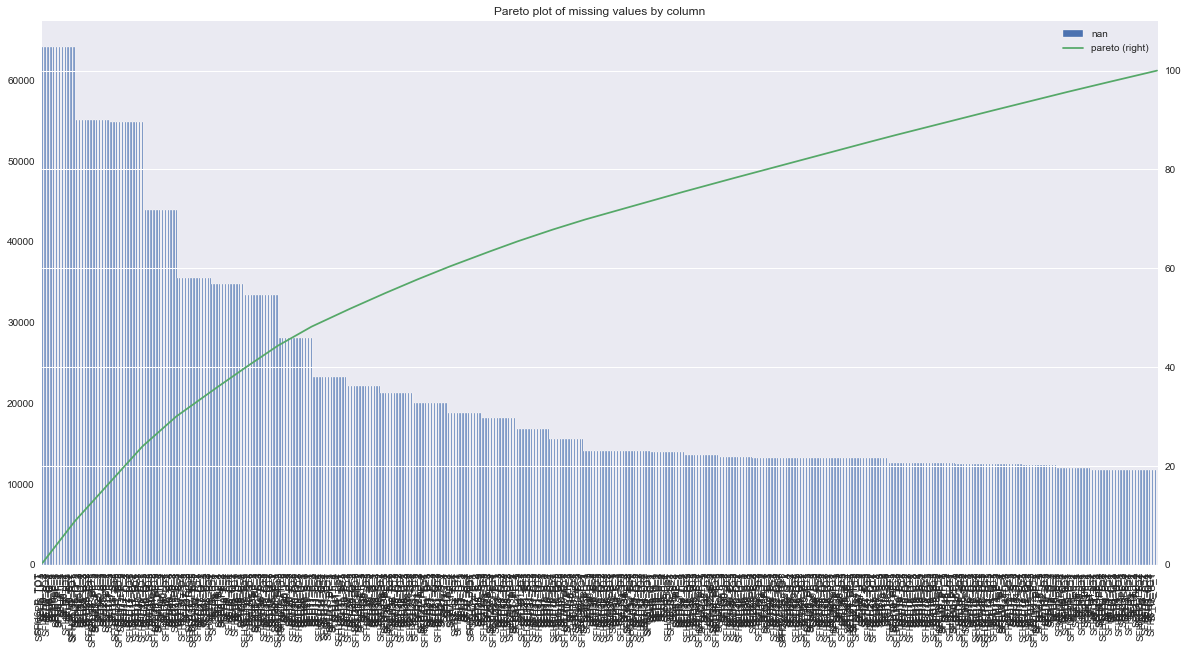

In [46]:
fig, axes = plt.subplots(figsize=(20, 10))
ax1 = missing_val.plot(use_index=True, y="nan", kind="bar", ax=axes)
ax2 = missing_val.plot(
    use_index=True, y="pareto", color="C1", kind="line", ax=axes, secondary_y=True
)
ax2.set_ylim([0, 110])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.xticks(rotation=90)
plt.title("Pareto plot of missing values by column")
plt.show()


## Removal of columns with high degree of missing values

In [47]:
# remove features with more than 60 % missing
data = data[data.columns[data.isnull().mean() < 0.6]]
